In [68]:
from asyncio import FastChildWatcher
import imageio
from matplotlib.pyplot import axis
import numpy as np
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
import matplotlib.image as img


def parse_image(img):
    """
    img: path to image

    return: 2D array of pixels in size (n x m, 3)
    """
    img = imageio.imread(img)
    print(img.shape)
    
    return (img/255).reshape(-1, 3)




def kmeans(X, k, iterations):

    rand_centroid = np.random.choice(len(X), k, replace=False)
    centroids = X[rand_centroid, :]

    tmpdiff = cdist(X, centroids, 'euclidean')

    labels = np.array([np.argmin(i) for i in tmpdiff])
    convergence = False
    iteration = 0
    #for iteration in range(iterations):
    while convergence == False:
        iteration += 1
        centroids_prev = centroids
        tmp = []
        for cluster in range(k):

            center = X[labels==cluster].mean(axis=0)
            tmp.append(center)

        centroids = np.vstack(tmp)

        diff = cdist(X, centroids, 'euclidean')

        labels = np.array([np.argmin(i) for i in diff])

        if abs(centroids - centroids_prev).max() < 0.001:
            print(f'Iteration to converge is {iteration}')
            convergence = True
    
    return labels, centroids


def compress_img(labels, centroids):
    
    x = [centroids[i] for i in labels]
    
    data = np.vstack(x).reshape(400, 400, 3)
    
    plt.imshow(data)
    
    plt.imsave('test.png', data)

In [70]:
img = parse_image('data/GeorgiaTech.bmp')
labels, centroids = kmeans(img, 32, 100)

print('centroids')
print(centroids.shape)

print('\nlabels')
print(np.unique(labels))
#compress_img(labels, centroids)

(400, 400, 3)
Iteration to converge is 84
centroids
(32, 3)

labels
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


In [71]:
np.unique(centroids, axis=0)

array([[0.05544441, 0.28187021, 0.36713613],
       [0.08887955, 0.08070302, 0.06972409],
       [0.12502464, 0.17780311, 0.215463  ],
       [0.13421152, 0.11129906, 0.09821223],
       [0.19621264, 0.18571398, 0.08317113],
       [0.20074351, 0.24880859, 0.28819383],
       [0.20837509, 0.12327657, 0.11751461],
       [0.2406028 , 0.41945846, 0.52055936],
       [0.26965974, 0.2181226 , 0.1859336 ],
       [0.29412298, 0.25063939, 0.08418674],
       [0.30802814, 0.30506804, 0.31624844],
       [0.35878199, 0.62134472, 0.76784543],
       [0.36165064, 0.51495181, 0.62106659],
       [0.36961365, 0.32659174, 0.12932146],
       [0.38522799, 0.37081556, 0.37569272],
       [0.46955679, 0.41434332, 0.10787028],
       [0.47784835, 0.47159468, 0.47668719],
       [0.50213319, 0.27147783, 0.16353355],
       [0.50418579, 0.57929668, 0.65389014],
       [0.50876713, 0.38699133, 0.29776759],
       [0.54649735, 0.65301926, 0.74424266],
       [0.60998524, 0.52714793, 0.1276582 ],
       [0.

In [75]:
np.unique(np.array([[1,2],[1,2]]), axis=0).shape[0]

1

In [33]:
labels

array([41, 41, 41, ..., 48, 48, 44])

In [28]:
X = parse_image('data/football.bmp')

(412, 620, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


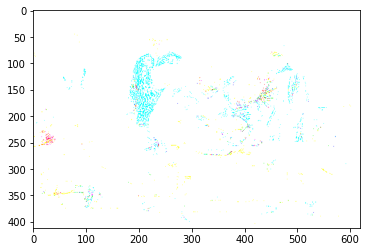

In [59]:
plt.imshow((X*255).reshape(412, 620, 3))

In [30]:
labels.reshape(412, 620)

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 2, 2, ..., 3, 3, 3],
       [3, 2, 2, ..., 3, 3, 3],
       [3, 2, 3, ..., 3, 3, 3]])

In [58]:
X*255

Array([[ 76.,  84.,  87.],
       [ 73.,  81.,  84.],
       [ 68.,  76.,  79.],
       ...,
       [121., 149.,  91.],
       [119., 147.,  89.],
       [106., 135.,  77.]])

In [37]:
centroids * 255

array([[246.51348618, 248.80849629, 251.03809845],
       [132.68254706, 158.3718336 , 105.43922845],
       [ 48.8711013 ,  57.95142147,  65.68617168],
       [ 16.27848622,  53.08329905, 101.90250926],
       [175.83670467, 113.67414491,  88.62559765],
       [  9.85400458,  20.44759725,  39.02791762],
       [203.56779548, 208.53286039, 208.68250569],
       [133.59243697,  95.59444647,  77.11655097],
       [ 36.79533957,  40.377587  ,  34.89376054],
       [161.69222113,  99.34350823,  75.37769025],
       [179.02764654, 133.86859143, 112.70778653],
       [ 25.72134387,  22.39397233,  15.49891304],
       [159.10900045, 164.80868385, 153.77634554],
       [199.90363962, 189.19376492, 177.69331742],
       [175.93259972, 180.33346433, 177.1300845 ],
       [192.48606016, 170.74082905, 156.6570066 ],
       [100.48282309, 104.02500584, 101.73358261],
       [133.27718833, 139.54986737, 144.60742706],
       [ 86.57910906,  74.90296979,  37.04889913],
       [172.285     , 162.21409

In [38]:
labels

array([41, 41, 41, ..., 48, 48, 44])

In [39]:
x = []
for i in labels:
    x.append(centroids[i])

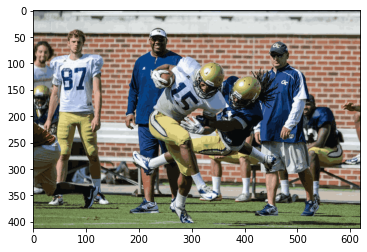

In [45]:
x = [centroids[i] for i in labels]
plt.imshow(np.vstack(x).reshape(412, 620, 3))

In [78]:
[x**2 for x in range(2, 10, 2)]

[4, 16, 36, 64]